In [42]:
# Python
import pandas as pd
from prophet import Prophet

In [43]:
reservaciones = pd.read_excel("../data/reservaciones_time_series.xlsx").sort_values(
    "fecha_ocupacion",
    ascending=True,
)
reservaciones

,fecha_ocupacion,h_num_per,h_num_noc,h_tot_hab,tasa_ocupacion
0,2019-02-13,1231,1498.0,604.0,0.437364
1,2019-02-14,1559,2969.5,730.0,0.528602
2,2019-02-15,1786,3245.0,798.0,0.577842
3,2019-02-16,1905,3706.5,855.0,0.619117
4,2019-02-17,1564,3651.0,692.0,0.501086
...,...,...,...,...,...
693,2021-01-06,57,107.5,19.5,0.014120
694,2021-01-07,56,106.5,18.5,0.013396
695,2021-01-08,56,106.5,18.5,0.013396
696,2021-01-09,6,10.5,2.0,0.001448


In [34]:
df = pd.read_csv('https://raw.githubusercontent.com/facebook/prophet/main/examples/example_wp_log_peyton_manning.csv')
df.head()

,ds,y
0,2007-12-10,9.590761
1,2007-12-11,8.519590
2,2007-12-12,8.183677
3,2007-12-13,8.072467
4,2007-12-14,7.893572


In [35]:
# Python

df = reservaciones[['fecha_ocupacion','tasa_ocupacion']]
df.columns = ['ds', 'y']
df['ds'] = pd.to_datetime(df['ds'])
df.head()


C:\Users\angel\AppData\Local\Temp\ipykernel_13328\947801702.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['ds'] = pd.to_datetime(df['ds'])


,ds,y
0,2019-02-13,0.437364
1,2019-02-14,0.528602
2,2019-02-15,0.577842
3,2019-02-16,0.619117
4,2019-02-17,0.501086


In [36]:
# Python
m = Prophet()
m.fit(df)

17:05:31 - cmdstanpy - INFO - Chain [1] start processing
17:05:31 - cmdstanpy - INFO - Chain [1] done processing


In [37]:
import pickle
 #Save the model
with open('prophet_model.pkl', 'wb') as f:
    pickle.dump(m, f)

In [38]:
# Load the saved Prophet model
with open('prophet_model.pkl', 'rb') as f:
    model = pickle.load(f)

In [39]:
future = model.make_future_dataframe(periods=30)  # e.g., forecast 30 future time steps

In [40]:
forecast = model.predict(future)

            ds      yhat  yhat_lower  yhat_upper
0   2019-02-13  0.421109    0.297062    0.536491
1   2019-02-14  0.457968    0.343019    0.576953
2   2019-02-15  0.553933    0.436454    0.664978
3   2019-02-16  0.550533    0.427590    0.668598
4   2019-02-17  0.451951    0.341798    0.572094
..         ...       ...         ...         ...
723 2021-02-05  0.168960    0.053162    0.283883
724 2021-02-06  0.165208    0.046182    0.284089
725 2021-02-07  0.066274   -0.053133    0.179421
726 2021-02-08  0.079392   -0.045222    0.202461
727 2021-02-09  0.073437   -0.044891    0.184956

[728 rows x 4 columns]


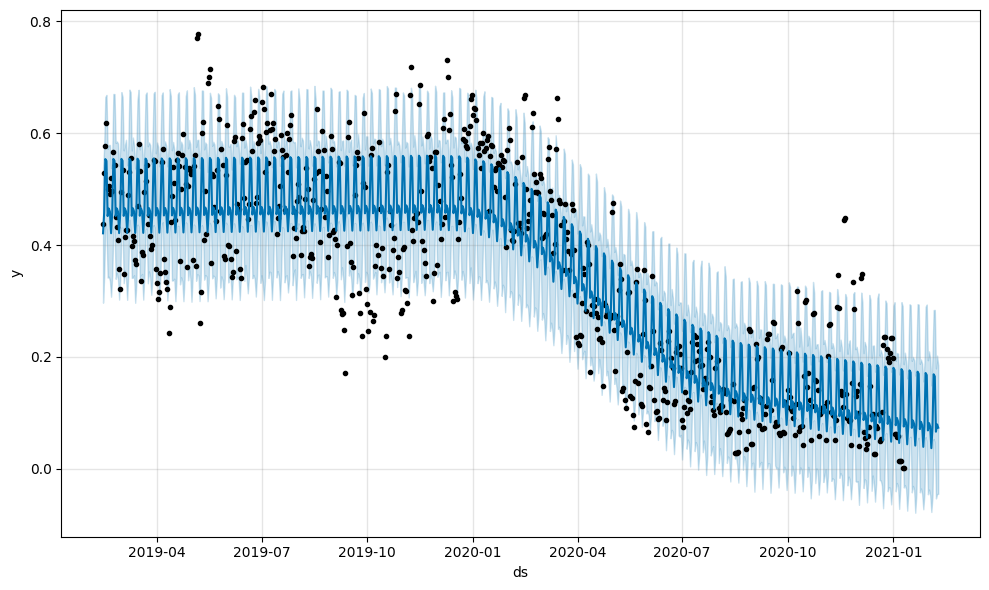

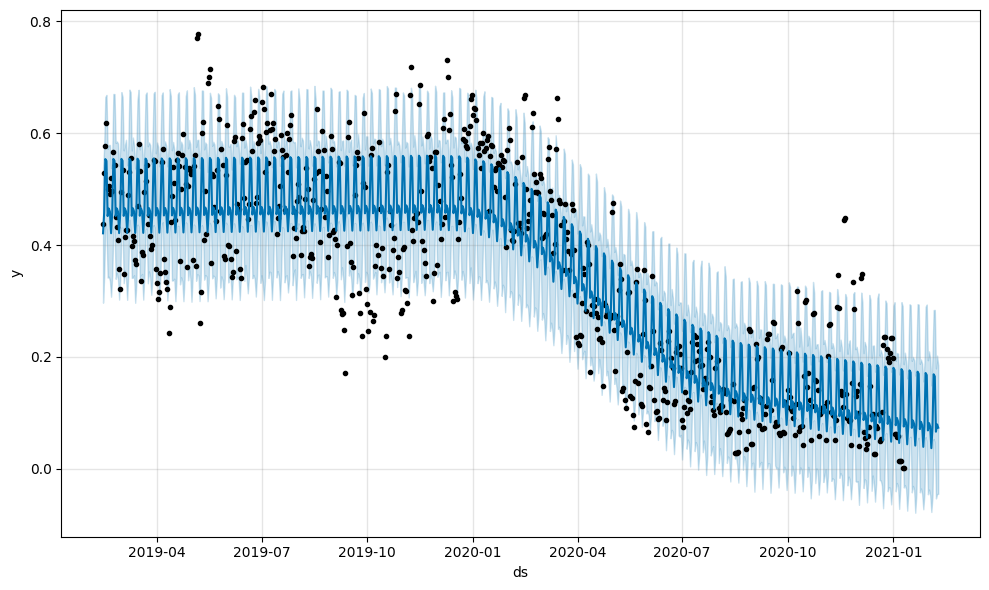

In [41]:
print(forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']])
model.plot(forecast)

In [14]:
# Python
future = m.make_future_dataframe(periods=365)
future.tail()

,ds
1058,2022-01-06
1059,2022-01-07
1060,2022-01-08
1061,2022-01-09
1062,2022-01-10


In [15]:
# Python
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
1058,2022-01-06,-0.037488,-0.245131,0.174079
1059,2022-01-07,0.058126,-0.160215,0.259002
1060,2022-01-08,0.054374,-0.162440,0.260675
1061,2022-01-09,-0.044560,-0.267045,0.163006
1062,2022-01-10,-0.031442,-0.253838,0.181254


In [16]:
# Python
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
1058,2022-01-06,-0.037488,-0.246626,0.160972
1059,2022-01-07,0.058126,-0.158406,0.283442
1060,2022-01-08,0.054374,-0.175569,0.274127
1061,2022-01-09,-0.044560,-0.267515,0.161663
1062,2022-01-10,-0.031442,-0.254440,0.177783


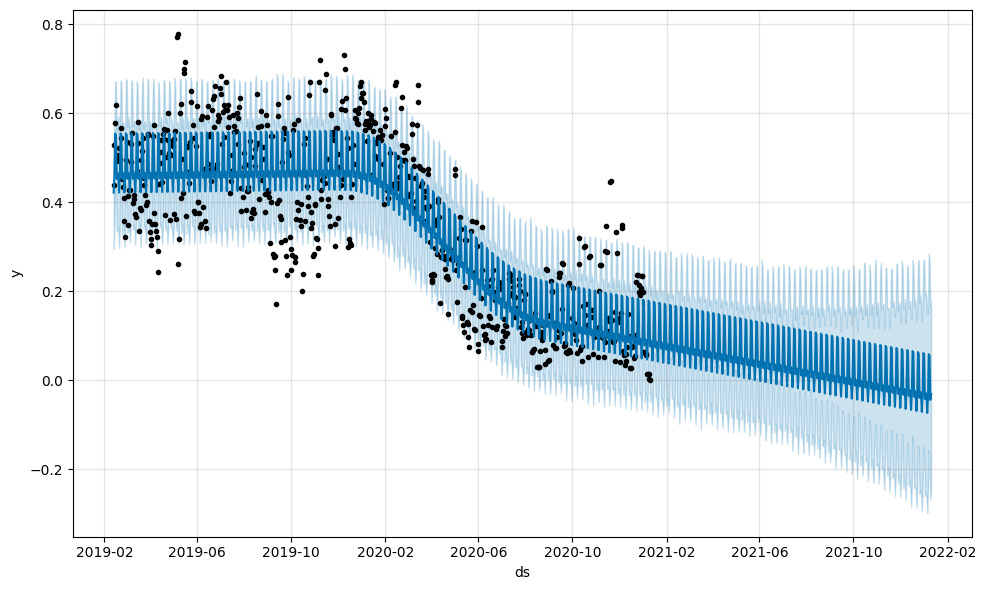

In [17]:
# Python
fig1 = m.plot(forecast)

In [18]:
# create a subset of the df dataframe from feb 2019 till feb 2020
df_subset_1 = df[(df['ds'] >= '2019-02-01') & (df['ds'] <= '2020-02-01')]
# create a subset of the df dataframe from march 2020 till the end of the dataframe
df_subset_2 = df[(df['ds'] >= '2020-03-01') & (df['ds'] <= '2021-02-01')]


# Antes de la pandemia

In [21]:
# Python
m = Prophet()
m.fit(df_subset_1)

16:50:21 - cmdstanpy - INFO - Chain [1] start processing
16:50:22 - cmdstanpy - INFO - Chain [1] done processing


In [22]:
# Python
future = m.make_future_dataframe(periods=365)
future.tail()


,ds
714,2021-01-27
715,2021-01-28
716,2021-01-29
717,2021-01-30
718,2021-01-31


In [23]:
# Python
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
714,2021-01-27,0.742169,0.588754,0.907337
715,2021-01-28,0.770638,0.613760,0.930751
716,2021-01-29,0.882354,0.722856,1.044990
717,2021-01-30,0.885820,0.721910,1.048234
718,2021-01-31,0.777348,0.612211,0.942384


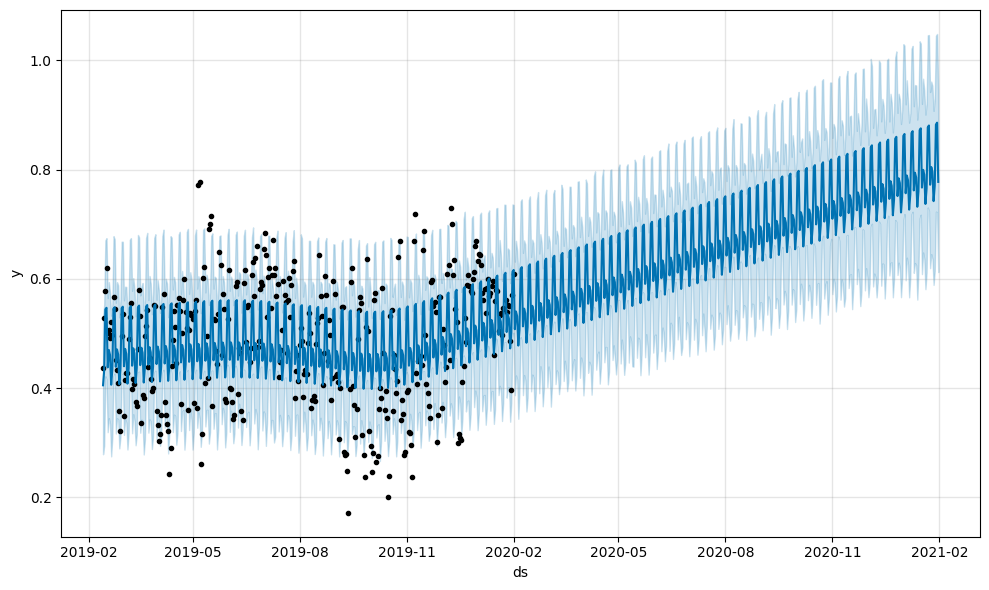

In [24]:
# Python
fig1 = m.plot(forecast)

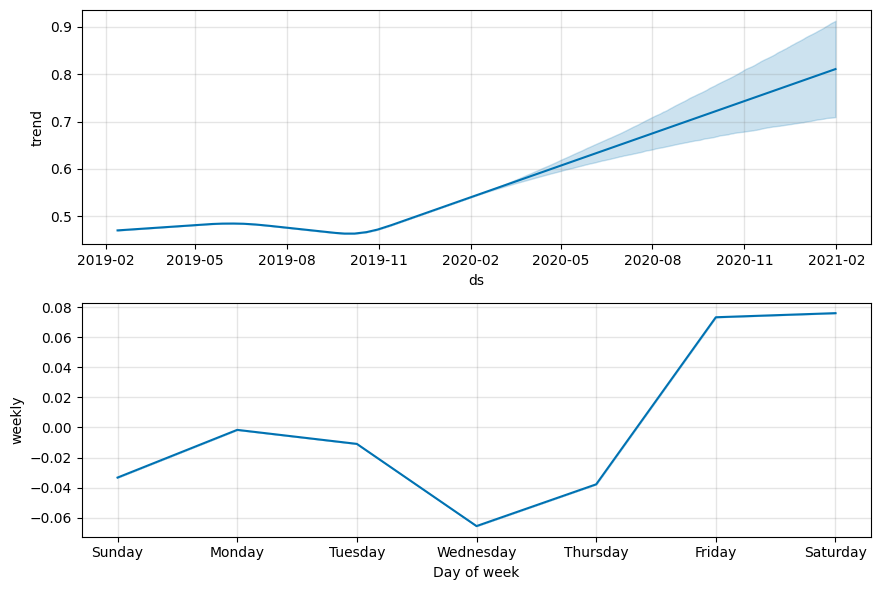

In [25]:
# Python
fig2 = m.plot_components(forecast)

# Después de la pandemia

In [26]:
# Python
m = Prophet()
m.fit(df_subset_2)

16:53:04 - cmdstanpy - INFO - Chain [1] start processing
16:53:04 - cmdstanpy - INFO - Chain [1] done processing


In [27]:
# Python
future = m.make_future_dataframe(periods=365)
future.tail()


,ds
676,2022-01-06
677,2022-01-07
678,2022-01-08
679,2022-01-09
680,2022-01-10


In [31]:
# Python
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(100)


,ds,yhat,yhat_lower,yhat_upper
581,2021-10-03,0.078195,-0.083805,0.238369
582,2021-10-04,0.078607,-0.079355,0.230499
583,2021-10-05,0.075582,-0.095213,0.230213
584,2021-10-06,0.051843,-0.110809,0.209586
585,2021-10-07,0.097896,-0.067716,0.258487
...,...,...,...,...
676,2022-01-06,0.089890,-0.145007,0.331480
677,2022-01-07,0.168955,-0.071442,0.391308
678,2022-01-08,0.156204,-0.076598,0.378083
679,2022-01-09,0.069573,-0.161536,0.285256


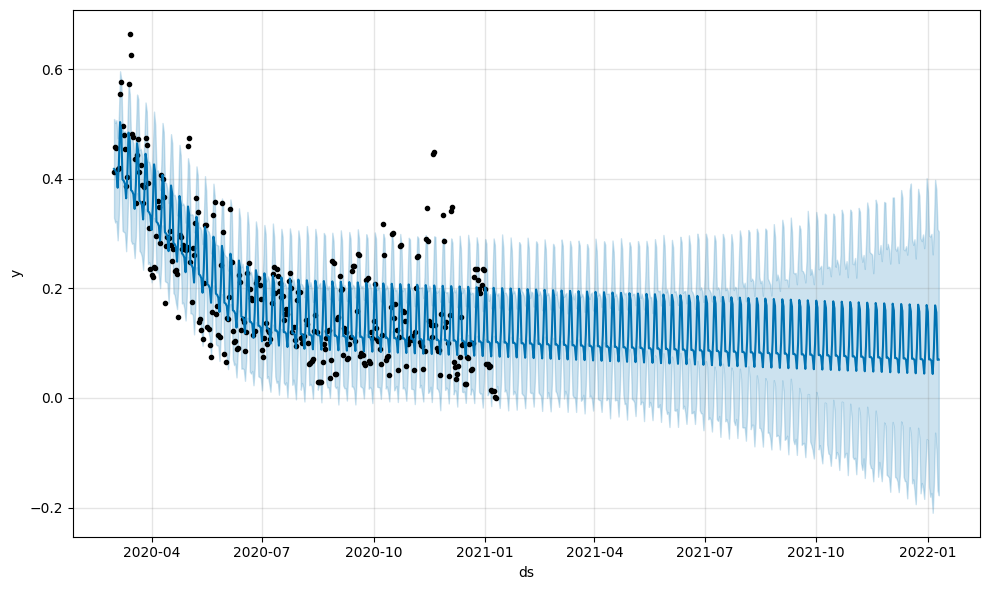

In [29]:
# Python
fig1 = m.plot(forecast)


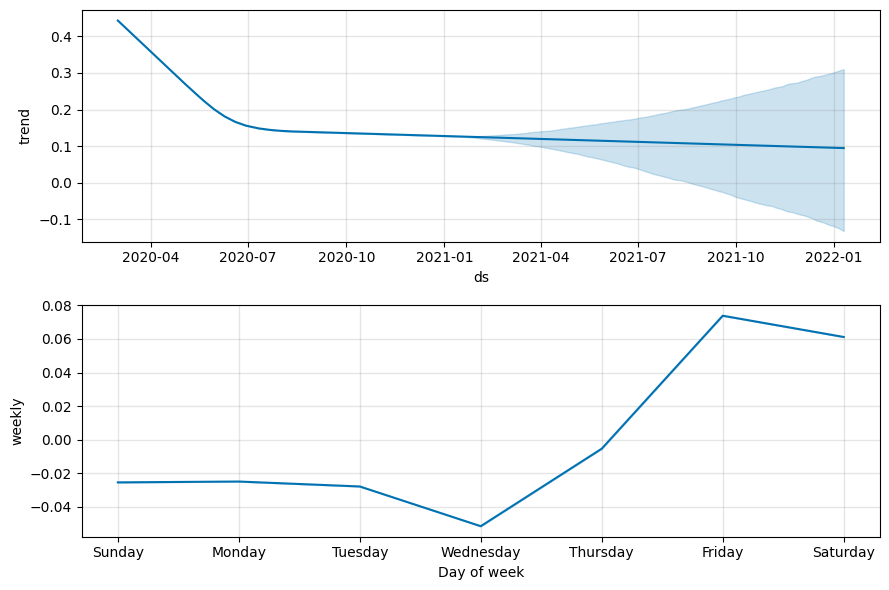

In [30]:
# Python
fig2 = m.plot_components(forecast)